In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
# import geopandas as gpd
# from shapely.geometry import Point
# import shapely.speedups
# import folium
# import os
# current_palette = sns.color_palette()
# sns.palplot(current_palette)
# sns.palplot(sns.color_palette("bright", 10))
# plt.show()





In [2]:
df = pd.read_csv('NFIRS_Clean.csv') #the reads in a hell of a lot quicker than the original excel
try:
    df.drop(columns = 'Unnamed: 0', axis = 1, inplace = True)
    print("Loaded and got rid of duplicate index")
except: 
    print('Loaded')

df

Loaded and got rid of duplicate index


,Incident Number,Incident Date,Basic Incident Hour Of Day 24,Incident Primary Action Taken,Apparatus Resource Actions Taken Code And Description 1,Apparatus Resource Arrival Date Time,Apparatus Resource Arrival Sequence Number By Overall Incident,Apparatus Resource On Scene Time in Minutes,Apparatus Resource Arrived To In Service In Minutes,Apparatus Resource Dispatch Date Time,...,Basic Civilian Casualty Count,Basic Property Pre-Incident Value,Basic Property Losses,Basic Contents Pre-Incident Value,Basic Incident Total Losses,year,month,day,dayofweek,Neighborhood
0,2016-00006845,2017-01-01 00:00:00,20,Provide manpower,NaN,2016-12-31 20:14:27,1,NaN,8.87,2016-12-31 20:08:52,...,0,NaN,NaN,NaN,NaN,2017,1,1,6,Fry's Spring
1,2016-00006845,2017-01-01 00:00:00,20,Provide manpower,NaN,2016-12-31 20:14:27,1,NaN,8.87,2016-12-31 20:08:52,...,0,NaN,NaN,NaN,NaN,2017,1,1,6,Fry's Spring
2,2016-00006845,2017-01-01 00:00:00,20,Provide manpower,NaN,2016-12-31 20:14:27,1,NaN,8.87,2016-12-31 20:08:52,...,0,NaN,NaN,NaN,NaN,2017,1,1,6,Fry's Spring
3,2016-00006845,2017-01-01 00:00:00,20,Provide manpower,NaN,2016-12-31 20:17:22,2,NaN,NaN,2016-12-31 20:08:52,...,0,NaN,NaN,NaN,NaN,2017,1,1,6,Fry's Spring
4,2017-00000006,2017-01-01 00:00:00,1,Hazardous materials spill control and confinement,NaN,2017-01-01 01:50:46,1,NaN,10.50,2017-01-01 01:44:36,...,0,NaN,NaN,NaN,NaN,2017,1,1,6,Ridge Street
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107723,2021-00005152,2021-06-25 00:00:00,19,Investigate,NaN,2021-06-25 19:27:28,2,NaN,4.73,2021-06-25 19:23:11,...,0,NaN,NaN,NaN,NaN,2021,6,25,4,UVA
107724,2021-00005155,2021-06-25 00:00:00,20,Investigate,NaN,2021-06-25 20:45:34,1,NaN,6.25,2021-06-25 20:43:19,...,0,NaN,NaN,NaN,NaN,2021,6,25,4,North Downtown
107725,2021-00005155,2021-06-25 00:00:00,20,Investigate,NaN,2021-06-25 20:45:34,1,NaN,6.25,2021-06-25 20:43:19,...,0,NaN,NaN,NaN,NaN,2021,6,25,4,North Downtown
107726,2021-00005155,2021-06-25 00:00:00,20,Investigate,NaN,2021-06-25 20:45:34,1,NaN,6.25,2021-06-25 20:43:19,...,0,NaN,NaN,NaN,NaN,2021,6,25,4,North Downtown


Lets make a small breakout of EMS calls only

In [3]:
df[['Basic Incident Type Category', 'Basic Incident Type Code And Description']]

,Basic Incident Type Category,Basic Incident Type Code And Description
0,3 - Rescue & Emergency Medical Service Incident,"321 - EMS call, excluding vehicle accident wit..."
1,3 - Rescue & Emergency Medical Service Incident,"321 - EMS call, excluding vehicle accident wit..."
2,3 - Rescue & Emergency Medical Service Incident,"321 - EMS call, excluding vehicle accident wit..."
3,3 - Rescue & Emergency Medical Service Incident,"321 - EMS call, excluding vehicle accident wit..."
4,3 - Rescue & Emergency Medical Service Incident,324 - Motor vehicle accident with no injuries.
...,...,...
107723,6 - Good Intent Call,"651 - Smoke scare, odor of smoke"
107724,7 - False Alarm & False Call,"740 - Unintentional transmission of alarm, other"
107725,7 - False Alarm & False Call,"740 - Unintentional transmission of alarm, other"
107726,7 - False Alarm & False Call,"740 - Unintentional transmission of alarm, other"


In [4]:
df['Basic Incident Type Category'].value_counts()

3 - Rescue & Emergency Medical Service Incident            60123
7 - False Alarm & False Call                               19060
6 - Good Intent Call                                        8700
4 - Hazardous Condition (No Fire)                           8350
1 - Fire                                                    6166
5 - Service Call                                            4950
2 - Overpressure Rupture, Explosion, Overheat (No Fire)      199
8 - Severe Weather & Natural Disaster                        104
9 - Special Incident Type                                     48
Name: Basic Incident Type Category, dtype: int64

In [5]:
df['Basic Incident Type Code And Description'].value_counts()

321 - EMS call, excluding vehicle accident with injury    44051
745 - Alarm system activation, no fire - unintentional     6958
311 - Medical assist, assist EMS crew                      5668
651 - Smoke scare, odor of smoke                           3656
324 - Motor vehicle accident with no injuries.             3199
                                                          ...  
812 - Flood assessment                                        3
481 - Attempt to burn                                         3
430 - Radioactive condition, other                            3
621 - Wrong location                                          3
480 - Attempted burning, illegal action, other                1
Name: Basic Incident Type Code And Description, Length: 139, dtype: int64

In [6]:
df['Basic Incident Type Code And Description'].unique()

array(['321 - EMS call, excluding vehicle accident with injury',
       '324 - Motor vehicle accident with no injuries.',
       '611 - Dispatched and cancelled en route',
       '743 - Smoke detector activation, no fire - unintentional',
       '511 - Lock-out', '311 - Medical assist, assist EMS crew',
       '651 - Smoke scare, odor of smoke', '521 - Water evacuation',
       '445 - Arcing, shorted electrical equipment',
       '520 - Water problem, other',
       '744 - Detector activation, no fire - unintentional',
       '322 - Motor vehicle accident with injuries',
       '700 - False alarm or false call, other',
       '400 - Hazardous condition, other', '111 - Building fire',
       '721 - Bomb scare - no bomb', '553 - Public service',
       '555 - Defective elevator, no occupants',
       '671 - HazMat release investigation w/no HazMat',
       '411 - Gasoline or other flammable liquid spill',
       '745 - Alarm system activation, no fire - unintentional',
       '331 - Lock

Looks like ems is 300 codes

In [7]:
df['Basic Incident Type Code And Description'].str.split(" -", expand = True)

,0,1,2
0,321,"EMS call, excluding vehicle accident with injury",None
1,321,"EMS call, excluding vehicle accident with injury",None
2,321,"EMS call, excluding vehicle accident with injury",None
3,321,"EMS call, excluding vehicle accident with injury",None
4,324,Motor vehicle accident with no injuries.,None
...,...,...,...
107723,651,"Smoke scare, odor of smoke",None
107724,740,"Unintentional transmission of alarm, other",None
107725,740,"Unintentional transmission of alarm, other",None
107726,740,"Unintentional transmission of alarm, other",None


In [8]:
df_codes = df['Basic Incident Type Code And Description'].str.split(" -", expand = True)

In [9]:
df_codes[0].isna().sum()

28

In [10]:
df_codes.fillna("0")

,0,1,2
0,321,"EMS call, excluding vehicle accident with injury",0
1,321,"EMS call, excluding vehicle accident with injury",0
2,321,"EMS call, excluding vehicle accident with injury",0
3,321,"EMS call, excluding vehicle accident with injury",0
4,324,Motor vehicle accident with no injuries.,0
...,...,...,...
107723,651,"Smoke scare, odor of smoke",0
107724,740,"Unintentional transmission of alarm, other",0
107725,740,"Unintentional transmission of alarm, other",0
107726,740,"Unintentional transmission of alarm, other",0


In [11]:
df_codes[0].fillna(value = '0', inplace = True)

In [12]:
df_codes[0].isna().sum()

0

In [13]:
df_codes[0] = df_codes[0].astype('int')

In [14]:
df['Incident Type Code'] = df_codes[0]

In [15]:
df

,Incident Number,Incident Date,Basic Incident Hour Of Day 24,Incident Primary Action Taken,Apparatus Resource Actions Taken Code And Description 1,Apparatus Resource Arrival Date Time,Apparatus Resource Arrival Sequence Number By Overall Incident,Apparatus Resource On Scene Time in Minutes,Apparatus Resource Arrived To In Service In Minutes,Apparatus Resource Dispatch Date Time,...,Basic Property Pre-Incident Value,Basic Property Losses,Basic Contents Pre-Incident Value,Basic Incident Total Losses,year,month,day,dayofweek,Neighborhood,Incident Type Code
0,2016-00006845,2017-01-01 00:00:00,20,Provide manpower,NaN,2016-12-31 20:14:27,1,NaN,8.87,2016-12-31 20:08:52,...,NaN,NaN,NaN,NaN,2017,1,1,6,Fry's Spring,321
1,2016-00006845,2017-01-01 00:00:00,20,Provide manpower,NaN,2016-12-31 20:14:27,1,NaN,8.87,2016-12-31 20:08:52,...,NaN,NaN,NaN,NaN,2017,1,1,6,Fry's Spring,321
2,2016-00006845,2017-01-01 00:00:00,20,Provide manpower,NaN,2016-12-31 20:14:27,1,NaN,8.87,2016-12-31 20:08:52,...,NaN,NaN,NaN,NaN,2017,1,1,6,Fry's Spring,321
3,2016-00006845,2017-01-01 00:00:00,20,Provide manpower,NaN,2016-12-31 20:17:22,2,NaN,NaN,2016-12-31 20:08:52,...,NaN,NaN,NaN,NaN,2017,1,1,6,Fry's Spring,321
4,2017-00000006,2017-01-01 00:00:00,1,Hazardous materials spill control and confinement,NaN,2017-01-01 01:50:46,1,NaN,10.50,2017-01-01 01:44:36,...,NaN,NaN,NaN,NaN,2017,1,1,6,Ridge Street,324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107723,2021-00005152,2021-06-25 00:00:00,19,Investigate,NaN,2021-06-25 19:27:28,2,NaN,4.73,2021-06-25 19:23:11,...,NaN,NaN,NaN,NaN,2021,6,25,4,UVA,651
107724,2021-00005155,2021-06-25 00:00:00,20,Investigate,NaN,2021-06-25 20:45:34,1,NaN,6.25,2021-06-25 20:43:19,...,NaN,NaN,NaN,NaN,2021,6,25,4,North Downtown,740
107725,2021-00005155,2021-06-25 00:00:00,20,Investigate,NaN,2021-06-25 20:45:34,1,NaN,6.25,2021-06-25 20:43:19,...,NaN,NaN,NaN,NaN,2021,6,25,4,North Downtown,740
107726,2021-00005155,2021-06-25 00:00:00,20,Investigate,NaN,2021-06-25 20:45:34,1,NaN,6.25,2021-06-25 20:43:19,...,NaN,NaN,NaN,NaN,2021,6,25,4,North Downtown,740


In [16]:
df['Incident Type Code'].dtypes

dtype('int32')

In [17]:
df.head()

,Incident Number,Incident Date,Basic Incident Hour Of Day 24,Incident Primary Action Taken,Apparatus Resource Actions Taken Code And Description 1,Apparatus Resource Arrival Date Time,Apparatus Resource Arrival Sequence Number By Overall Incident,Apparatus Resource On Scene Time in Minutes,Apparatus Resource Arrived To In Service In Minutes,Apparatus Resource Dispatch Date Time,...,Basic Property Pre-Incident Value,Basic Property Losses,Basic Contents Pre-Incident Value,Basic Incident Total Losses,year,month,day,dayofweek,Neighborhood,Incident Type Code
0,2016-00006845,2017-01-01 00:00:00,20,Provide manpower,NaN,2016-12-31 20:14:27,1,NaN,8.87,2016-12-31 20:08:52,...,NaN,NaN,NaN,NaN,2017,1,1,6,Fry's Spring,321
1,2016-00006845,2017-01-01 00:00:00,20,Provide manpower,NaN,2016-12-31 20:14:27,1,NaN,8.87,2016-12-31 20:08:52,...,NaN,NaN,NaN,NaN,2017,1,1,6,Fry's Spring,321
2,2016-00006845,2017-01-01 00:00:00,20,Provide manpower,NaN,2016-12-31 20:14:27,1,NaN,8.87,2016-12-31 20:08:52,...,NaN,NaN,NaN,NaN,2017,1,1,6,Fry's Spring,321
3,2016-00006845,2017-01-01 00:00:00,20,Provide manpower,NaN,2016-12-31 20:17:22,2,NaN,NaN,2016-12-31 20:08:52,...,NaN,NaN,NaN,NaN,2017,1,1,6,Fry's Spring,321
4,2017-00000006,2017-01-01 00:00:00,1,Hazardous materials spill control and confinement,NaN,2017-01-01 01:50:46,1,NaN,10.50,2017-01-01 01:44:36,...,NaN,NaN,NaN,NaN,2017,1,1,6,Ridge Street,324


In [18]:
df["Incident Type Code"].between(300, 400).value_counts()

True     60256
False    47472
Name: Incident Type Code, dtype: int64

In [19]:
ems_types = df[df["Incident Type Code"].between(300, 399)]['Basic Incident Type Code And Description'].unique()

In [20]:
ems_codes_list = [i for i in ems_types]

In [21]:
ems_codes_list

['321 - EMS call, excluding vehicle accident with injury',
 '324 - Motor vehicle accident with no injuries.',
 '311 - Medical assist, assist EMS crew',
 '322 - Motor vehicle accident with injuries',
 '331 - Lock-in (if lock out , use 511 )',
 '300 - Rescue, EMS incident, other',
 '353 - Removal of victim(s) from stalled elevator',
 '320 - Emergency medical service, other',
 '323 - Motor vehicle/pedestrian accident (MV Ped)',
 '357 - Extrication of victim(s) from machinery',
 '351 - Extrication of victim(s) from building/structure',
 '381 - Rescue or EMS standby',
 '352 - Extrication of victim(s) from vehicle',
 '350 - Extrication, rescue, other',
 '363 - Swift water rescue',
 '356 - High-angle rescue',
 '372 - Trapped by power lines',
 '370 - Electrical rescue, other',
 '354 - Trench/below-grade rescue',
 '341 - Search for person on land']

In [22]:
codes_to_keep = ems_codes_list[0:9]
codes_to_keep.remove('331 - Lock-in (if lock out , use 511 )')
codes_to_keep

['321 - EMS call, excluding vehicle accident with injury',
 '324 - Motor vehicle accident with no injuries.',
 '311 - Medical assist, assist EMS crew',
 '322 - Motor vehicle accident with injuries',
 '300 - Rescue, EMS incident, other',
 '353 - Removal of victim(s) from stalled elevator',
 '320 - Emergency medical service, other',
 '323 - Motor vehicle/pedestrian accident (MV Ped)']

In [23]:
#this is what I wanted.  https://stackoverflow.com/questions/12096252/use-a-list-of-values-to-select-rows-from-a-pandas-dataframe
# evertying in our ems list

ems_df = df[df['Basic Incident Type Code And Description'].isin(ems_codes_list)].copy()

ems_df

,Incident Number,Incident Date,Basic Incident Hour Of Day 24,Incident Primary Action Taken,Apparatus Resource Actions Taken Code And Description 1,Apparatus Resource Arrival Date Time,Apparatus Resource Arrival Sequence Number By Overall Incident,Apparatus Resource On Scene Time in Minutes,Apparatus Resource Arrived To In Service In Minutes,Apparatus Resource Dispatch Date Time,...,Basic Property Pre-Incident Value,Basic Property Losses,Basic Contents Pre-Incident Value,Basic Incident Total Losses,year,month,day,dayofweek,Neighborhood,Incident Type Code
0,2016-00006845,2017-01-01 00:00:00,20,Provide manpower,NaN,2016-12-31 20:14:27,1,NaN,8.87,2016-12-31 20:08:52,...,NaN,NaN,NaN,NaN,2017,1,1,6,Fry's Spring,321
1,2016-00006845,2017-01-01 00:00:00,20,Provide manpower,NaN,2016-12-31 20:14:27,1,NaN,8.87,2016-12-31 20:08:52,...,NaN,NaN,NaN,NaN,2017,1,1,6,Fry's Spring,321
2,2016-00006845,2017-01-01 00:00:00,20,Provide manpower,NaN,2016-12-31 20:14:27,1,NaN,8.87,2016-12-31 20:08:52,...,NaN,NaN,NaN,NaN,2017,1,1,6,Fry's Spring,321
3,2016-00006845,2017-01-01 00:00:00,20,Provide manpower,NaN,2016-12-31 20:17:22,2,NaN,NaN,2016-12-31 20:08:52,...,NaN,NaN,NaN,NaN,2017,1,1,6,Fry's Spring,321
4,2017-00000006,2017-01-01 00:00:00,1,Hazardous materials spill control and confinement,NaN,2017-01-01 01:50:46,1,NaN,10.50,2017-01-01 01:44:36,...,NaN,NaN,NaN,NaN,2017,1,1,6,Ridge Street,324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107713,2021-00005151,2021-06-25 00:00:00,18,Provide advanced life support (ALS),NaN,2021-06-25 18:47:44,2,39.23,89.83,2021-06-25 18:42:28,...,NaN,NaN,NaN,NaN,2021,6,25,4,The Meadows,321
107714,2021-00005151,2021-06-25 00:00:00,18,Provide advanced life support (ALS),NaN,2021-06-25 18:47:44,2,39.23,89.83,2021-06-25 18:42:28,...,NaN,NaN,NaN,NaN,2021,6,25,4,The Meadows,321
107715,2021-00005151,2021-06-25 00:00:00,18,Provide advanced life support (ALS),NaN,2021-06-25 18:47:44,2,39.23,89.83,2021-06-25 18:42:28,...,NaN,NaN,NaN,NaN,2021,6,25,4,The Meadows,321
107716,2021-00005151,2021-06-25 00:00:00,18,Provide advanced life support (ALS),NaN,2021-06-25 18:47:44,3,39.23,89.83,2021-06-25 18:42:28,...,NaN,NaN,NaN,NaN,2021,6,25,4,The Meadows,321


Lets only look at EMS calls and not all the personnel records

In [24]:

ems_df2 = df[df['Basic Incident Type Code And Description'].isin(codes_to_keep)].copy()

ems_df2

,Incident Number,Incident Date,Basic Incident Hour Of Day 24,Incident Primary Action Taken,Apparatus Resource Actions Taken Code And Description 1,Apparatus Resource Arrival Date Time,Apparatus Resource Arrival Sequence Number By Overall Incident,Apparatus Resource On Scene Time in Minutes,Apparatus Resource Arrived To In Service In Minutes,Apparatus Resource Dispatch Date Time,...,Basic Property Pre-Incident Value,Basic Property Losses,Basic Contents Pre-Incident Value,Basic Incident Total Losses,year,month,day,dayofweek,Neighborhood,Incident Type Code
0,2016-00006845,2017-01-01 00:00:00,20,Provide manpower,NaN,2016-12-31 20:14:27,1,NaN,8.87,2016-12-31 20:08:52,...,NaN,NaN,NaN,NaN,2017,1,1,6,Fry's Spring,321
1,2016-00006845,2017-01-01 00:00:00,20,Provide manpower,NaN,2016-12-31 20:14:27,1,NaN,8.87,2016-12-31 20:08:52,...,NaN,NaN,NaN,NaN,2017,1,1,6,Fry's Spring,321
2,2016-00006845,2017-01-01 00:00:00,20,Provide manpower,NaN,2016-12-31 20:14:27,1,NaN,8.87,2016-12-31 20:08:52,...,NaN,NaN,NaN,NaN,2017,1,1,6,Fry's Spring,321
3,2016-00006845,2017-01-01 00:00:00,20,Provide manpower,NaN,2016-12-31 20:17:22,2,NaN,NaN,2016-12-31 20:08:52,...,NaN,NaN,NaN,NaN,2017,1,1,6,Fry's Spring,321
4,2017-00000006,2017-01-01 00:00:00,1,Hazardous materials spill control and confinement,NaN,2017-01-01 01:50:46,1,NaN,10.50,2017-01-01 01:44:36,...,NaN,NaN,NaN,NaN,2017,1,1,6,Ridge Street,324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107713,2021-00005151,2021-06-25 00:00:00,18,Provide advanced life support (ALS),NaN,2021-06-25 18:47:44,2,39.23,89.83,2021-06-25 18:42:28,...,NaN,NaN,NaN,NaN,2021,6,25,4,The Meadows,321
107714,2021-00005151,2021-06-25 00:00:00,18,Provide advanced life support (ALS),NaN,2021-06-25 18:47:44,2,39.23,89.83,2021-06-25 18:42:28,...,NaN,NaN,NaN,NaN,2021,6,25,4,The Meadows,321
107715,2021-00005151,2021-06-25 00:00:00,18,Provide advanced life support (ALS),NaN,2021-06-25 18:47:44,2,39.23,89.83,2021-06-25 18:42:28,...,NaN,NaN,NaN,NaN,2021,6,25,4,The Meadows,321
107716,2021-00005151,2021-06-25 00:00:00,18,Provide advanced life support (ALS),NaN,2021-06-25 18:47:44,3,39.23,89.83,2021-06-25 18:42:28,...,NaN,NaN,NaN,NaN,2021,6,25,4,The Meadows,321


In [25]:
# ems_df.columns

In [26]:
ems_df.shape

(60123, 56)

In [27]:
ems_df2.shape

(59567, 56)

In [28]:
ems_df.drop(columns = ['Apparatus Personnel Full Name', 'Apparatus Personnel Role'], axis = 1, inplace = True)

In [29]:
ems_df2.drop(columns = ['Apparatus Personnel Full Name', 'Apparatus Personnel Role'], axis = 1, inplace = True)

In [30]:
ems_df.drop_duplicates(subset = ['Incident Number', 'Apparatus Resource ID'], inplace = True)

In [31]:
ems_df2.drop_duplicates(subset = ['Incident Number', 'Apparatus Resource ID'], inplace = True)

In [32]:
ems_df.shape

(26730, 54)

In [33]:
ems_df2.shape

(26486, 54)

In [34]:
ems_df2

,Incident Number,Incident Date,Basic Incident Hour Of Day 24,Incident Primary Action Taken,Apparatus Resource Actions Taken Code And Description 1,Apparatus Resource Arrival Date Time,Apparatus Resource Arrival Sequence Number By Overall Incident,Apparatus Resource On Scene Time in Minutes,Apparatus Resource Arrived To In Service In Minutes,Apparatus Resource Dispatch Date Time,...,Basic Property Pre-Incident Value,Basic Property Losses,Basic Contents Pre-Incident Value,Basic Incident Total Losses,year,month,day,dayofweek,Neighborhood,Incident Type Code
0,2016-00006845,2017-01-01 00:00:00,20,Provide manpower,NaN,2016-12-31 20:14:27,1,NaN,8.87,2016-12-31 20:08:52,...,NaN,NaN,NaN,NaN,2017,1,1,6,Fry's Spring,321
3,2016-00006845,2017-01-01 00:00:00,20,Provide manpower,NaN,2016-12-31 20:17:22,2,NaN,NaN,2016-12-31 20:08:52,...,NaN,NaN,NaN,NaN,2017,1,1,6,Fry's Spring,321
4,2017-00000006,2017-01-01 00:00:00,1,Hazardous materials spill control and confinement,NaN,2017-01-01 01:50:46,1,NaN,10.50,2017-01-01 01:44:36,...,NaN,NaN,NaN,NaN,2017,1,1,6,Ridge Street,324
11,2017-00000012,2017-01-01 00:00:00,5,Provide first aid & check for injuries,92 - Standby,2017-01-01 05:59:46,1,NaN,7.58,2017-01-01 05:52:44,...,NaN,NaN,NaN,NaN,2017,1,1,6,The Meadows,321
15,2017-00000012,2017-01-01 00:00:00,5,Provide first aid & check for injuries,NaN,2017-01-01 06:01:59,2,NaN,32.27,2017-01-01 05:56:44,...,NaN,NaN,NaN,NaN,2017,1,1,6,The Meadows,321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107708,2021-00005148,2021-06-25 00:00:00,15,Investigate,NaN,2021-06-25 15:19:20,1,NaN,2.62,2021-06-25 15:05:58,...,NaN,NaN,NaN,NaN,2021,6,25,4,Belmont,321
107710,2021-00005150,2021-06-25 00:00:00,15,Provide basic life support (BLS),NaN,2021-06-25 15:48:18,1,NaN,11.52,2021-06-25 15:46:22,...,NaN,NaN,NaN,NaN,2021,6,25,4,Jefferson Park Avenue,321
107712,2021-00005151,2021-06-25 00:00:00,18,Provide advanced life support (ALS),NaN,2021-06-25 18:47:44,1,39.23,89.83,2021-06-25 18:42:28,...,NaN,NaN,NaN,NaN,2021,6,25,4,The Meadows,321
107713,2021-00005151,2021-06-25 00:00:00,18,Provide advanced life support (ALS),NaN,2021-06-25 18:47:44,2,39.23,89.83,2021-06-25 18:42:28,...,NaN,NaN,NaN,NaN,2021,6,25,4,The Meadows,321


out of curosity does EMS have any values for property loss?

In [35]:
ems_df2['Basic Property Pre-Incident Value'].isna().sum() #doesn't look like it we could get rid of those columns if we needed to

26476

<function matplotlib.pyplot.show(close=None, block=None)>

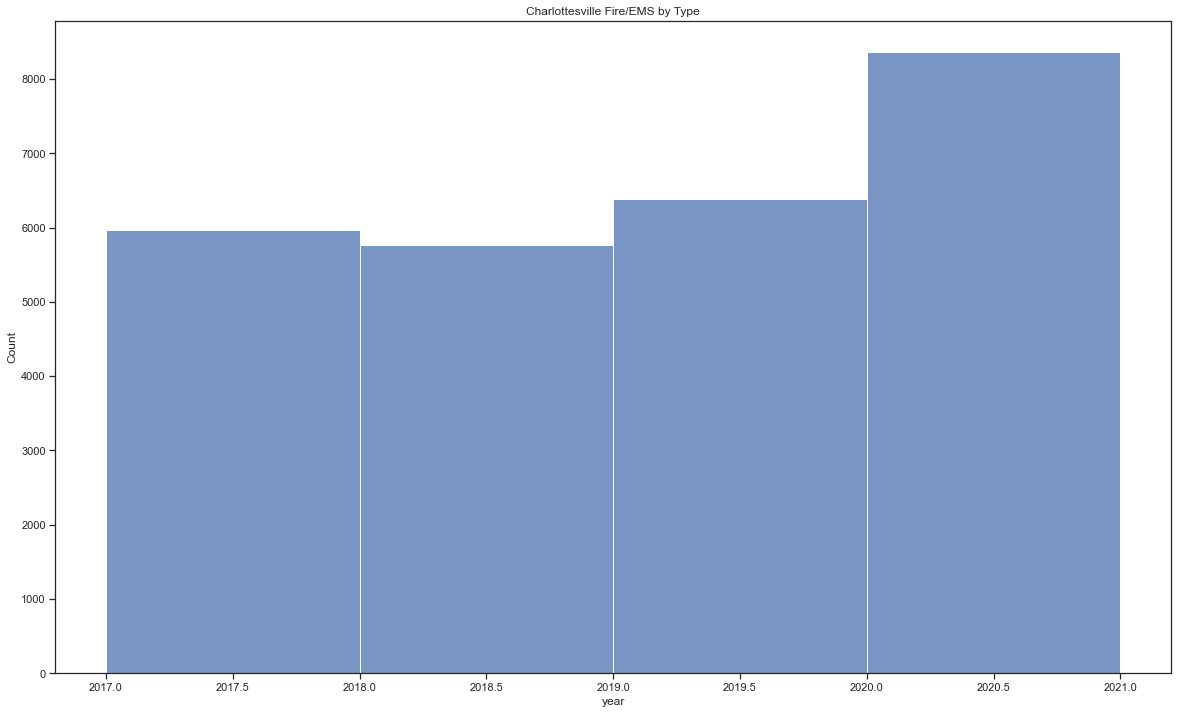

In [36]:
plt.figure(figsize=(20,12))
sns.set(style="ticks")

#bin 54 = 4.5 years

sns.histplot(data=ems_df2, x='year', stat='count', bins = 4).set(title = "Charlottesville Fire/EMS by Type") #, hue="FireType", hue='Basic Incident Type Code And Description'

plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

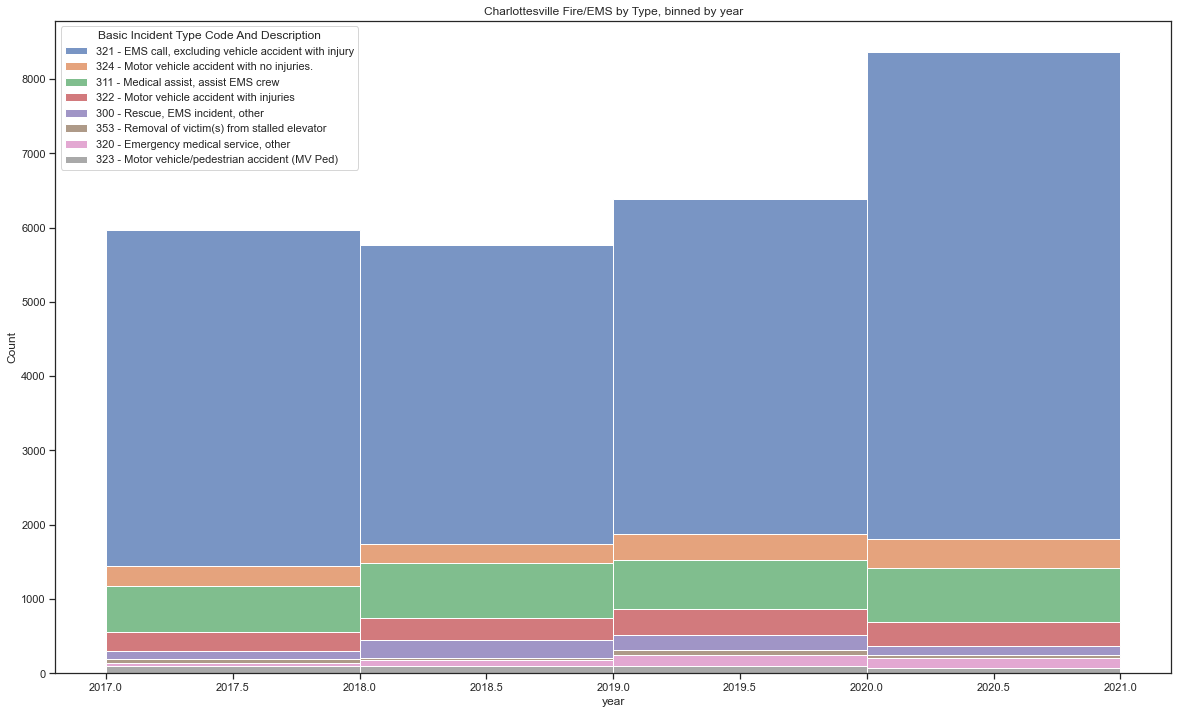

In [37]:
plt.figure(figsize=(20,12))
g = sns.histplot(data=ems_df2, x='year', stat= 'count', bins = 4, hue='Basic Incident Type Code And Description', multiple = 'stack')
g.set(title = "Charlottesville Fire/EMS by Type, binned by year")
# plt.title('Incidents in North Downtown Neigherborhood of Charlottsville with North Downtown Highlighted')
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# # plt.tight_layout();
plt.savefig('call_type_histogram.png')
# g.set(style="ticks")

#bin 54 = 4.5 years

#place legend in center right of plot
#plt.legend(loc='upper left')

 #, hue="FireType",

plt.show

In [63]:
!pip install squarify

In [80]:
# g = sns.histplot(data=ems_df2, x='year', stat= 'count', bins = 4, hue='Basic Incident Type Code And Description', multiple = 'stack')

ems_labels = ems_df2['Basic Incident Type Code And Description'].value_counts().index.to_list()
ems_data = ems_df2['Basic Incident Type Code And Description'].value_counts().values

In [87]:
ems_data2 = [x for x in ems_data]
ems_data2

[19628, 2739, 1257, 1223, 668, 419, 353, 199]

In [104]:
ems_labels2 = [x.split(',')[0].split('- ')[1] for x in ems_labels]
ems_labels2

['EMS call',
 'Medical assist',
 'Motor vehicle accident with no injuries.',
 'Motor vehicle accident with injuries',
 'Rescue',
 'Emergency medical service',
 'Motor vehicle/pedestrian accident (MV Ped)',
 'Removal of victim(s) from stalled elevator']

In [105]:
# ems_labels2[2] = 'MV Acc'
# ems_labels2[3] = 'MV Acc w/ Inj'
ems_labels2[6] = 'MV Ped'
ems_labels2[7] = 'Elev. Res.'
ems_labels2

['EMS call',
 'Medical assist',
 'Motor vehicle accident with no injuries.',
 'Motor vehicle accident with injuries',
 'Rescue',
 'Emergency medical service',
 'MV Ped',
 'Elev. Res.']

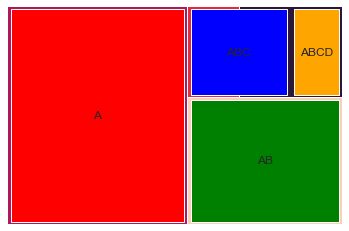

In [72]:
import squarify

data = [500, 250, 60, 120]
squarify.plot(data)
labels = ['A', 'AB', 'ABC', 'ABCD']
sizes = [500, 250, 120, 60]
color = ['red', 'green', 'blue', 'orange']
# squarify.plot(sizes,color=color, label = labels)
squarify.plot(sizes,color=color, label = labels, pad = True)
plt.axis('off')
plt.show()

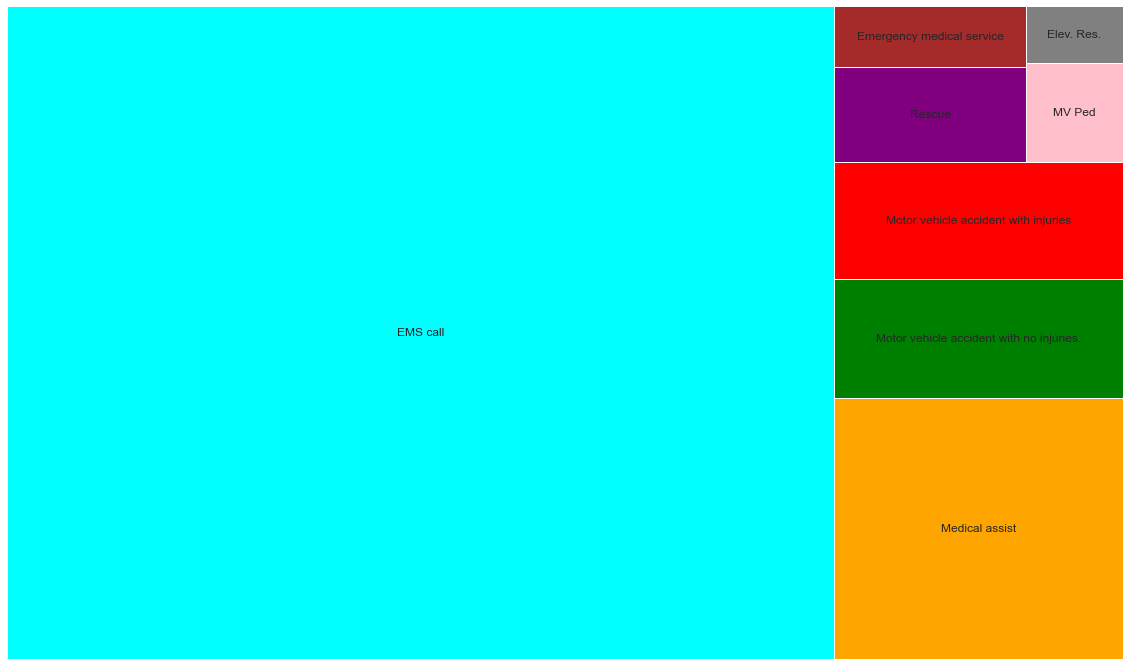

In [108]:
plt.figure(figsize=(20,12))
data = ems_data
squarify.plot(data)
labels = ems_labels2
sizes = ems_data#[500, 250, 120, 60]
color = ['aqua', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'grey']
squarify.plot(sizes, color=color, label = labels)
# squarify.plot(sizes,color=color, label = labels, pad = True)
plt.axis('off')
plt.show()

In [38]:
ems_df2.groupby(['year', 'Basic Incident Type Code And Description']).size().to_frame()

0
year Basic Incident Type Code And Description                
2017 300 - Rescue, EMS incident, other                    101
     311 - Medical assist, assist EMS crew                609
     320 - Emergency medical service, other                53
     321 - EMS call, excluding vehicle accident with...  4527
     322 - Motor vehicle accident with injuries           261
     323 - Motor vehicle/pedestrian accident (MV Ped)      92
     324 - Motor vehicle accident with no injuries.       272
     353 - Removal of victim(s) from stalled elevator      53
2018 300 - Rescue, EMS incident, other                    238
     311 - Medical assist, assist EMS crew                742
     320 - Emergency medical service, other                86
     321 - EMS call, excluding vehicle accident with...  4026
     322 - Motor vehicle accident with injuries           298
     323 - Motor vehicle/pedestrian accident (MV Ped)      93
     324 - Motor vehicle accident with no injuries.       249
     353 - Removal of victim(s) from stalled elevator      33
2019 300 - Rescue, EMS incident, other                    213
     311 - Medical assist, assist EMS crew                666
     320 - Emergency medical service, other               140
     321 - EMS call, excluding vehicle accident with...  4518
     322 - Motor vehicle accident with injuries           339
     323 - Motor vehicle/pedestrian accident (MV Ped)     100
     324 - Motor vehicle accident with no injuries.       345
     353 - Removal of victim(s) from stalled elevator      68
2020 300 - Rescue, EMS incident, other                     69
     311 - Medical assist, assist EMS crew                500
     320 - Emergency medical service, other               112
     321 - EMS call, excluding vehicle accident with...  4280
     322 - Motor vehicle accident with injuries           239
     323 - Motor vehicle/pedestrian accident (MV Ped)      55
     324 - Motor vehicle accident with no injuries.       250
     353 - Removal of victim(s) from stalled elevator      26
2021 300 - Rescue, EMS incident, other                     47
     311 - Medical assist, assist EMS crew                222
     320 - Emergency medical service, other                28
     321 - EMS call, excluding vehicle accident with...  2277
     322 - Motor vehicle accident with injuries            86
     323 - Motor vehicle/pedestrian accident (MV Ped)      13
     324 - Motor vehicle accident with no injuries.       141
     353 - Removal of victim(s) from stalled elevator      19

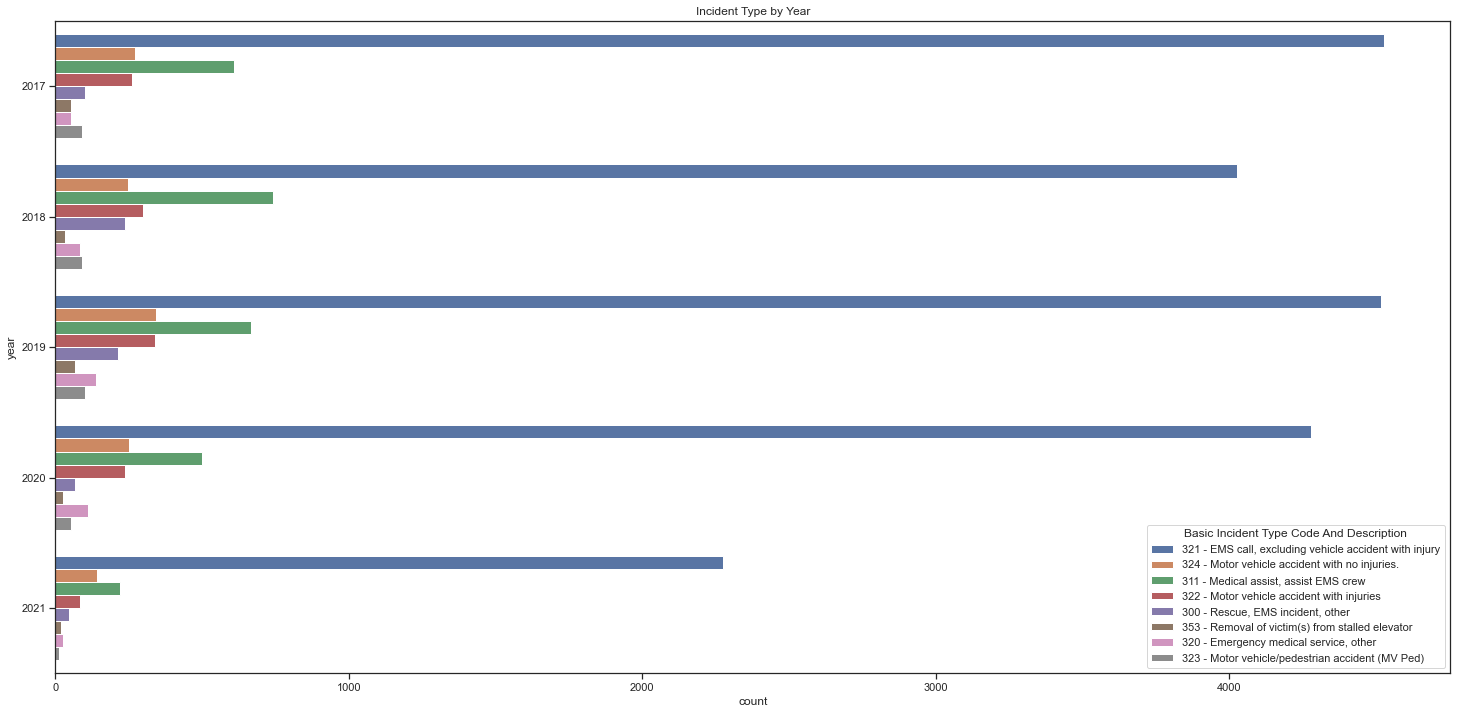

In [39]:
plt.figure(figsize=(25,12))
sns.countplot(y='year', data=ems_df2, hue='Basic Incident Type Code And Description').set(title = 'Incident Type by Year')
plt.savefig('call_type_histogram.png')


<function matplotlib.pyplot.show(close=None, block=None)>

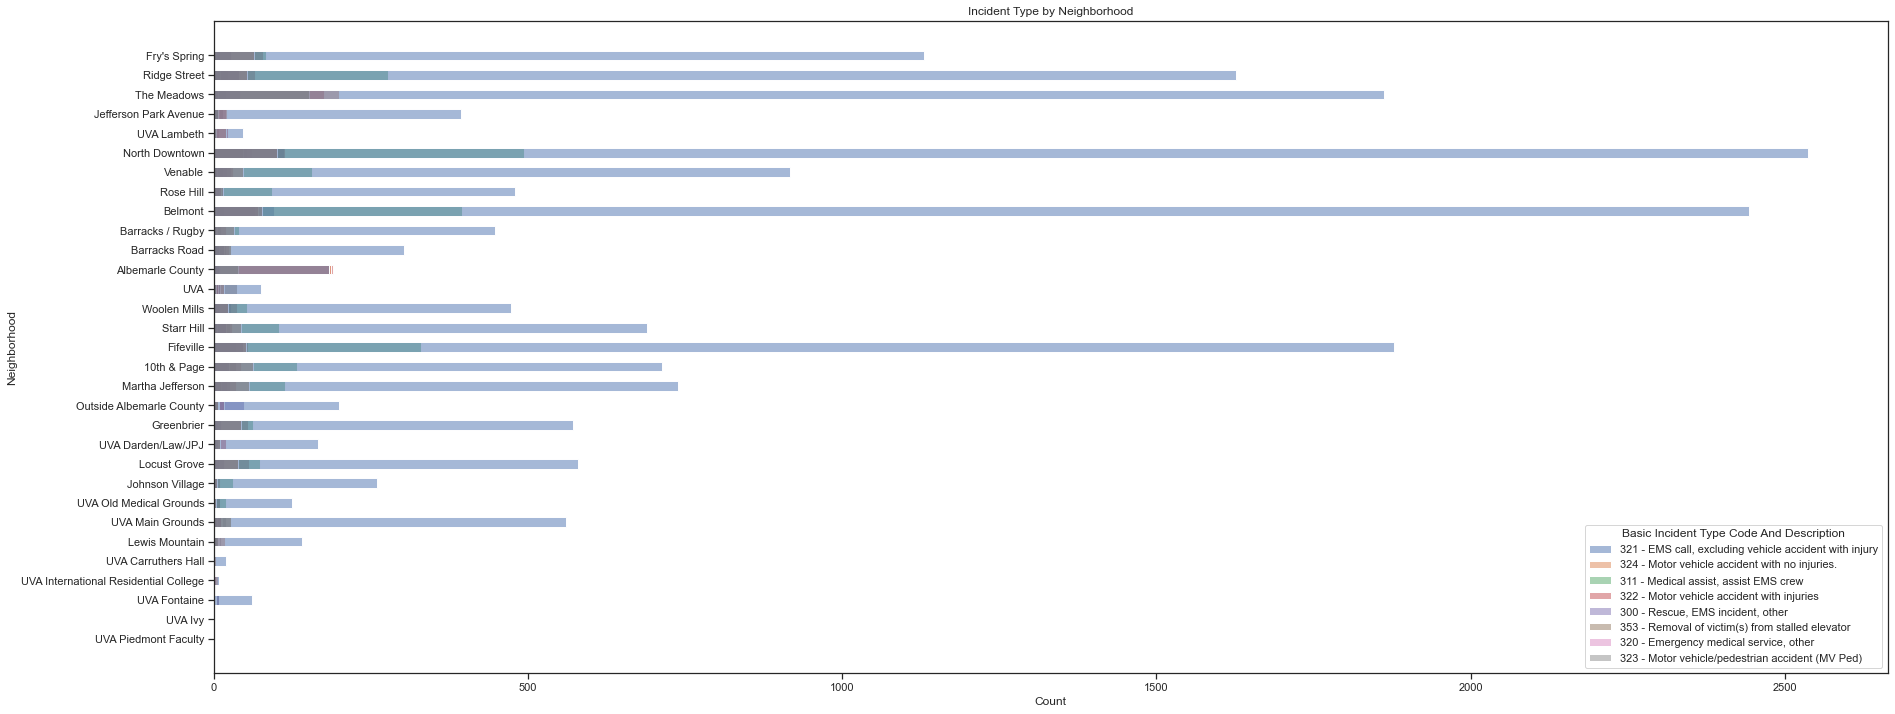

In [40]:
plt.figure(figsize=(30,12))
sns.set(style="ticks")

#bin 54 = 4.5 years

sns.histplot(data=ems_df2, y='Neighborhood', hue='Basic Incident Type Code And Description', stat='count', shrink = 0.5).set(title = "Incident Type by Neighborhood") #, hue="FireType", x='Basic Incident Type Code And Description', multiple = 'stack'
plt.savefig('call_type_hood.png')
plt.show

In [41]:
ems_df[['year', 'Basic Incident Type Code And Description']].value_counts(['year', 'Basic Incident Type Code And Description']).to_frame()


,,0
year,Basic Incident Type Code And Description,
2017,"321 - EMS call, excluding vehicle accident with injury",4527
2019,"321 - EMS call, excluding vehicle accident with injury",4518
2020,"321 - EMS call, excluding vehicle accident with injury",4280
2018,"321 - EMS call, excluding vehicle accident with injury",4026
2021,"321 - EMS call, excluding vehicle accident with injury",2277
...,...,...
2019,341 - Search for person on land,1
2020,341 - Search for person on land,1
2018,372 - Trapped by power lines,1


<function matplotlib.pyplot.show(close=None, block=None)>

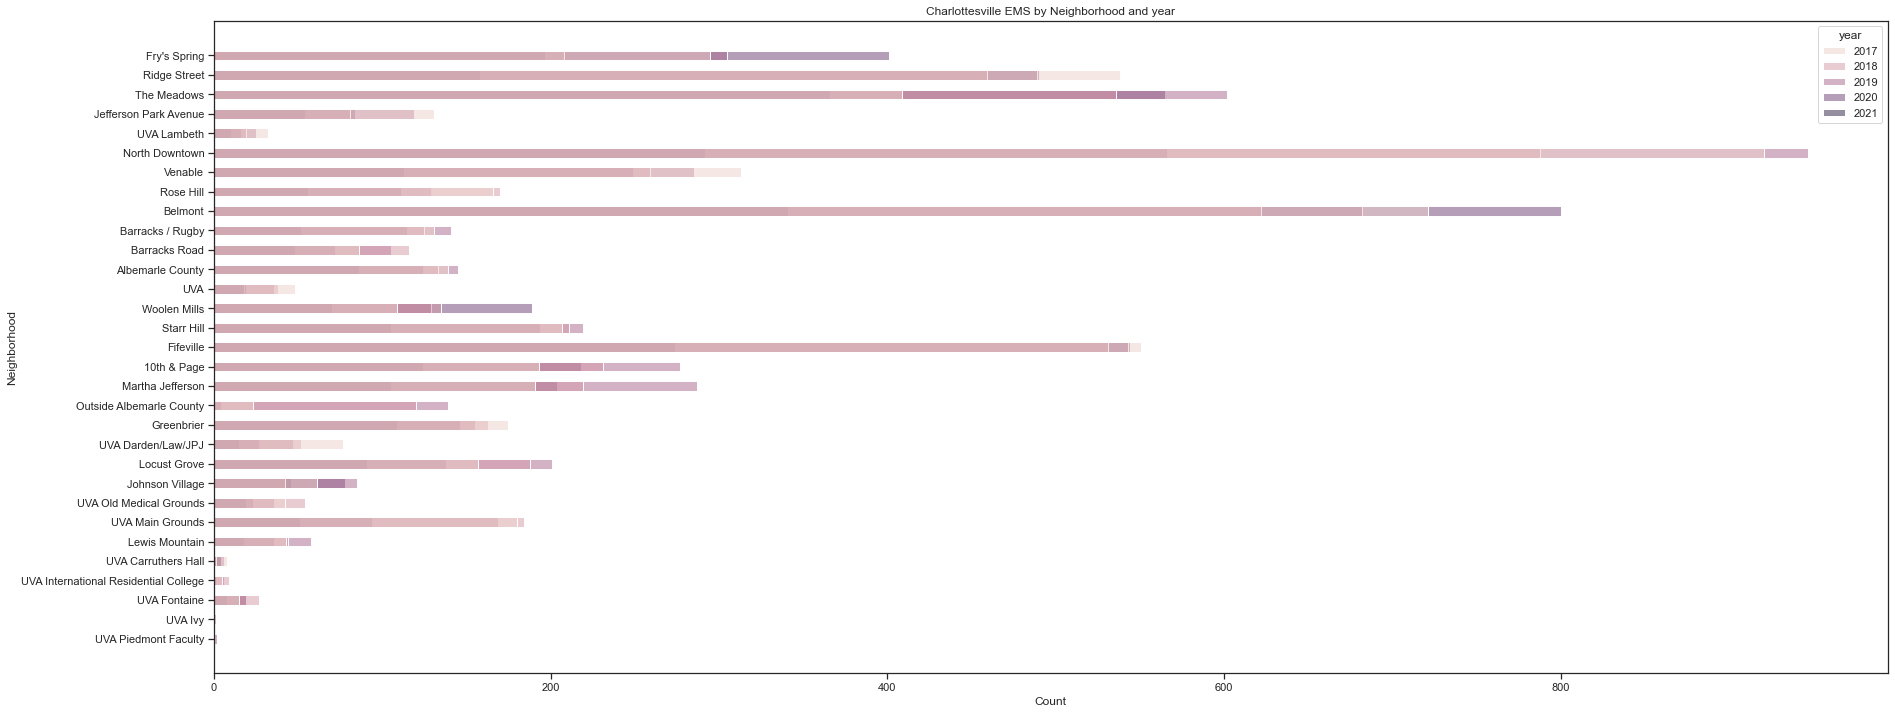

In [42]:
plt.figure(figsize=(30,12))
sns.set(style="ticks")

#bin 54 = 4.5 years

sns.histplot(data=ems_df2, y='Neighborhood', hue='year', stat='count', shrink = 0.5).set(title = "Charlottesville EMS by Neighborhood and year") #, hue="FireType", x='Basic Incident Type Code And Description', multiple = 'stack'

plt.show

In [43]:
ems_df[['year', 'Basic Incident Type Code And Description']].value_counts(['year', 'Basic Incident Type Code And Description']).sort_index().to_frame()


0
year Basic Incident Type Code And Description                
2017 300 - Rescue, EMS incident, other                    101
     311 - Medical assist, assist EMS crew                609
     320 - Emergency medical service, other                53
     321 - EMS call, excluding vehicle accident with...  4527
     322 - Motor vehicle accident with injuries           259
...                                                       ...
2021 323 - Motor vehicle/pedestrian accident (MV Ped)      13
     324 - Motor vehicle accident with no injuries.       141
     331 - Lock-in (if lock out , use 511 )                 3
     353 - Removal of victim(s) from stalled elevator      19
     381 - Rescue or EMS standby                           19

[76 rows x 1 columns]

In [44]:
ems_df.groupby(['year', 'Basic Incident Type Code And Description']).size().unstack().T


year,2017,2018,2019,2020,2021
Basic Incident Type Code And Description,,,,,
"300 - Rescue, EMS incident, other",101.0,238.0,213.0,69.0,47.0
"311 - Medical assist, assist EMS crew",609.0,742.0,666.0,500.0,222.0
"320 - Emergency medical service, other",53.0,86.0,140.0,112.0,28.0
"321 - EMS call, excluding vehicle accident with injury",4527.0,4026.0,4518.0,4280.0,2277.0
322 - Motor vehicle accident with injuries,259.0,298.0,339.0,239.0,86.0
323 - Motor vehicle/pedestrian accident (MV Ped),92.0,93.0,100.0,55.0,13.0
324 - Motor vehicle accident with no injuries.,272.0,249.0,345.0,250.0,141.0
"331 - Lock-in (if lock out , use 511 )",12.0,12.0,15.0,5.0,3.0
341 - Search for person on land,NaN,NaN,1.0,1.0,NaN


In [45]:
# for name, group in ems_df.groupby('year'):
#     print(name)
#     print(group)

In [46]:
ems_df[['year', 'Basic Shift Or Platoon']].value_counts(['year', 'Basic Shift Or Platoon']).sort_index().to_frame()

0
year Basic Shift Or Platoon      
2017 "A" Shift               2043
     "B" Shift               1989
     "C" Shift               1976
2018 "A" Shift               1880
     "B" Shift               2038
     "C" Shift               1919
2019 "A" Shift               2114
     "B" Shift               2245
     "C" Shift               2092
2020 "A" Shift               1917
     "B" Shift               1744
     "C" Shift               1916
2021 "A" Shift                950
     "B" Shift                941
     "C" Shift                964

In [47]:
ems_df.groupby(['year', 'Basic Shift Or Platoon']).size().unstack()

Basic Shift Or Platoon,"""A"" Shift","""B"" Shift","""C"" Shift"
year,,,
2017,2043,1989,1976
2018,1880,2038,1919
2019,2114,2245,2092
2020,1917,1744,1916
2021,950,941,964


<function matplotlib.pyplot.show(close=None, block=None)>

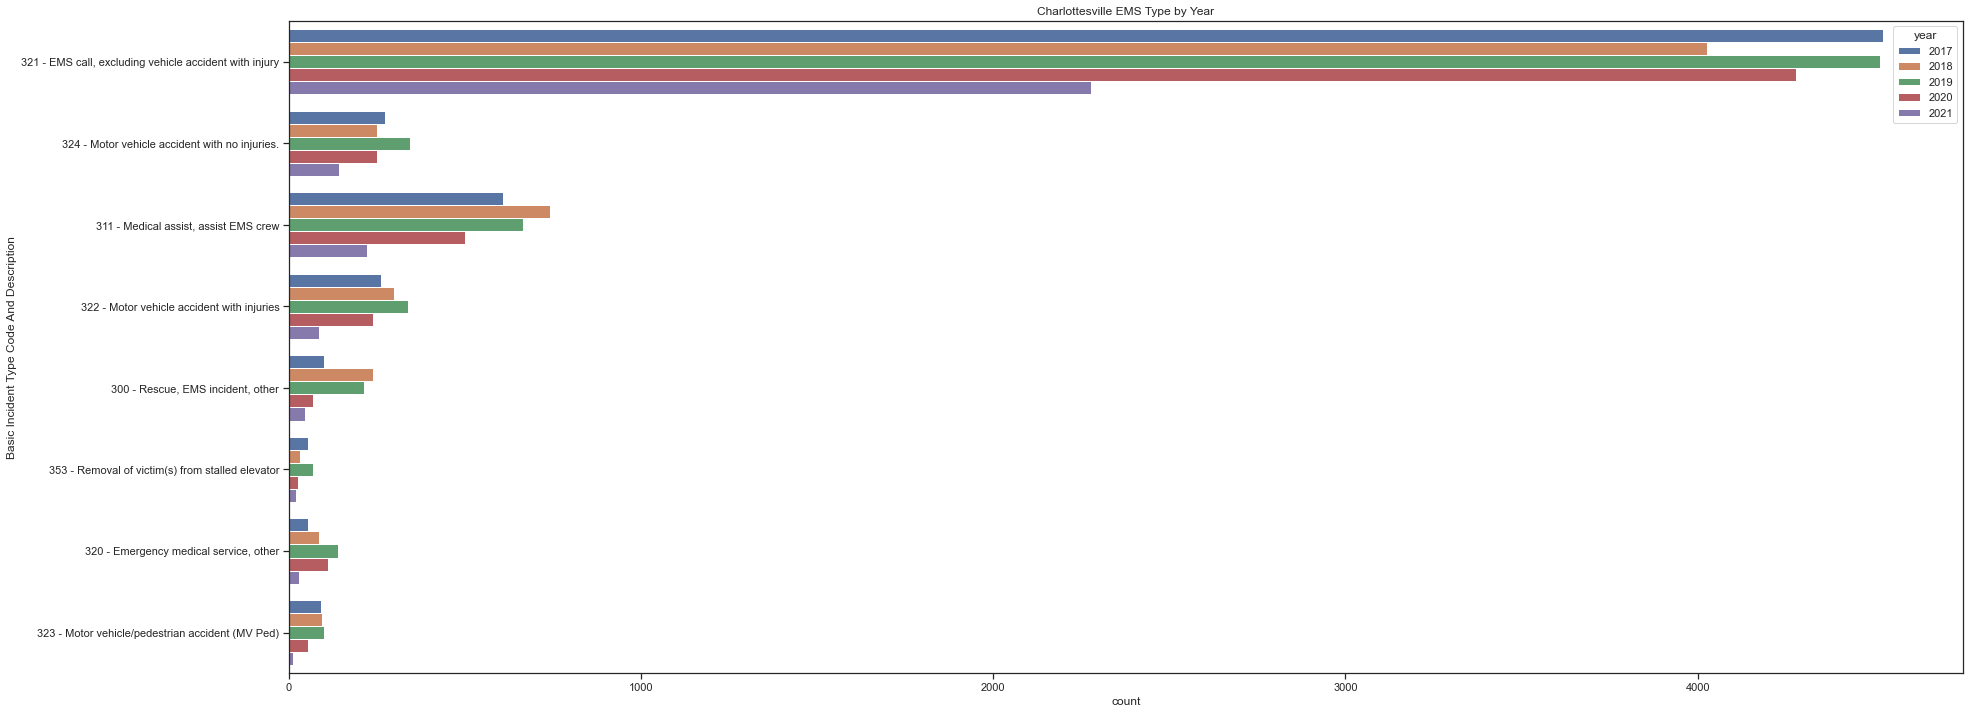

In [48]:
plt.figure(figsize=(30,12))

sns.countplot(data=ems_df2, y = 'Basic Incident Type Code And Description', hue = 'year').set(title = "Charlottesville EMS Type by Year") #, hue="FireType", 

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

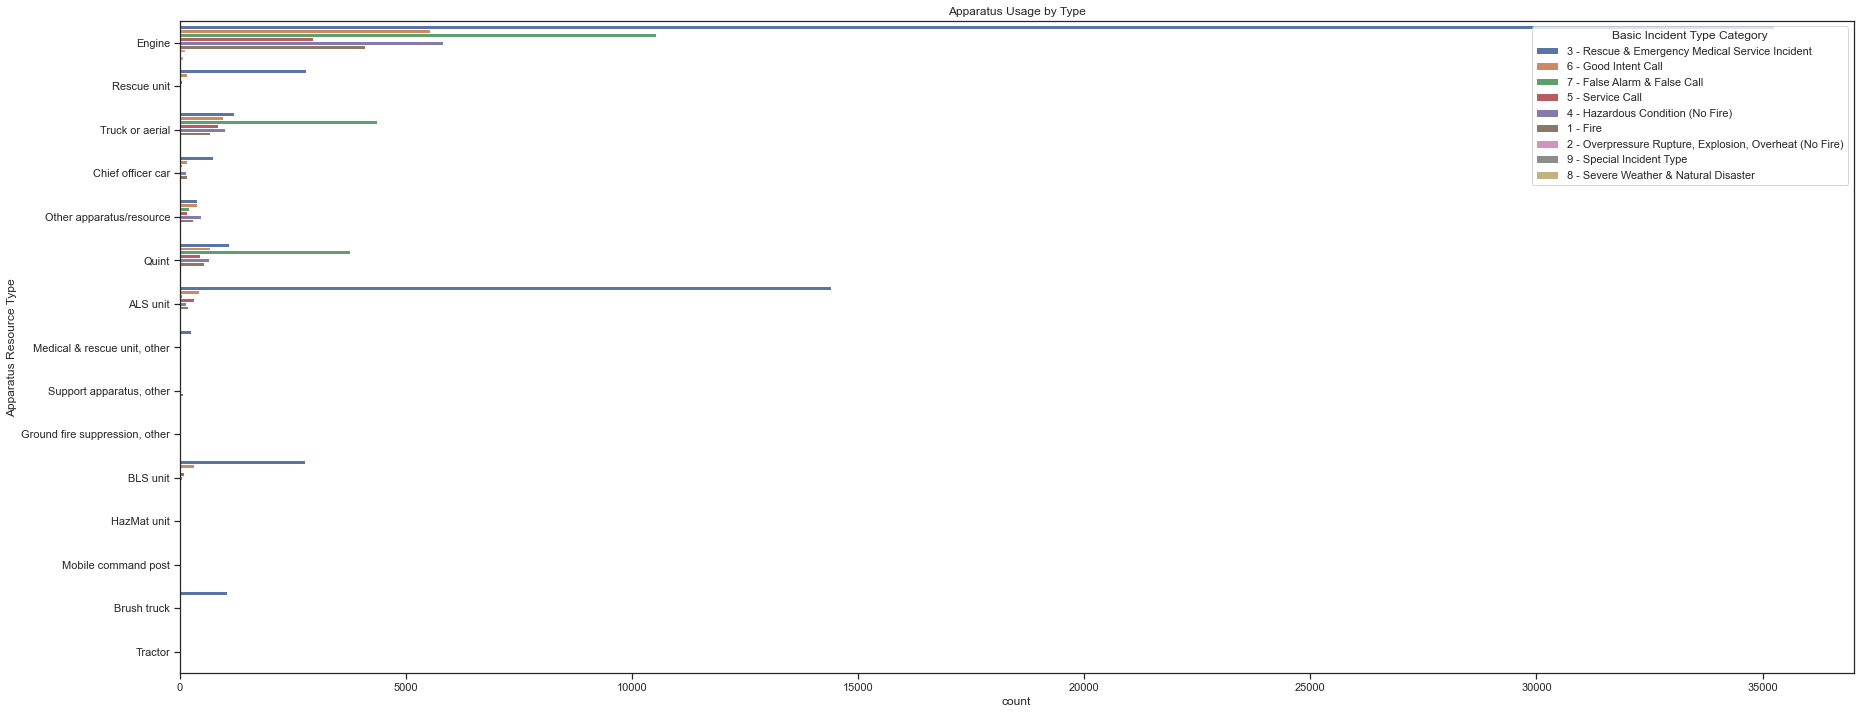

In [49]:
plt.figure(figsize=(30,12))

sns.countplot(data=df, y = 'Apparatus Resource Type', hue = 'Basic Incident Type Category').set(title = "Apparatus Usage by Type") #, hue="FireType", 
plt.savefig('Apparatus_by_type.png')
plt.show

In [50]:
df_normal_app = df[df['Apparatus Resource Type'] == (('Engine') or ('Rescue unit') or ('Truck or aerial') or ('Chief officer car') or ('Quint') or ('ALS unit') or ('BLS unit') or ('Other apparatus/resource'))]

In [51]:
engine_df = df[df['Apparatus Resource Type'] == 'Engine']
rescue_df = df[df['Apparatus Resource Type'] == 'Rescue unit']
truck_df = df[df['Apparatus Resource Type'] == 'Truck or aerial']
chief_df = df[df['Apparatus Resource Type'] == 'Chief officer car']
quint_df = df[df['Apparatus Resource Type'] == 'Quint']
ALS_df = df[df['Apparatus Resource Type'] == 'ALS unit']
BLS_df = df[df['Apparatus Resource Type'] == 'BLS unit']
other_df = df[df['Apparatus Resource Type'] == 'Other apparatus/resource']


In [52]:
df_normal_app = pd.concat([engine_df, rescue_df, truck_df, chief_df, quint_df, ALS_df, BLS_df, other_df], axis = 0)

In [53]:
df_normal_app['Apparatus Resource Type']

0                           Engine
1                           Engine
2                           Engine
4                           Engine
5                           Engine
                    ...           
107462    Other apparatus/resource
107624    Other apparatus/resource
107679    Other apparatus/resource
107702    Other apparatus/resource
107712    Other apparatus/resource
Name: Apparatus Resource Type, Length: 105885, dtype: object

In [54]:
df_normal_app['Apparatus Resource Type'].value_counts()

Engine                      64449
ALS unit                    15555
Truck or aerial              9095
Quint                        7182
BLS unit                     3279
Rescue unit                  3117
Other apparatus/resource     1925
Chief officer car            1283
Name: Apparatus Resource Type, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

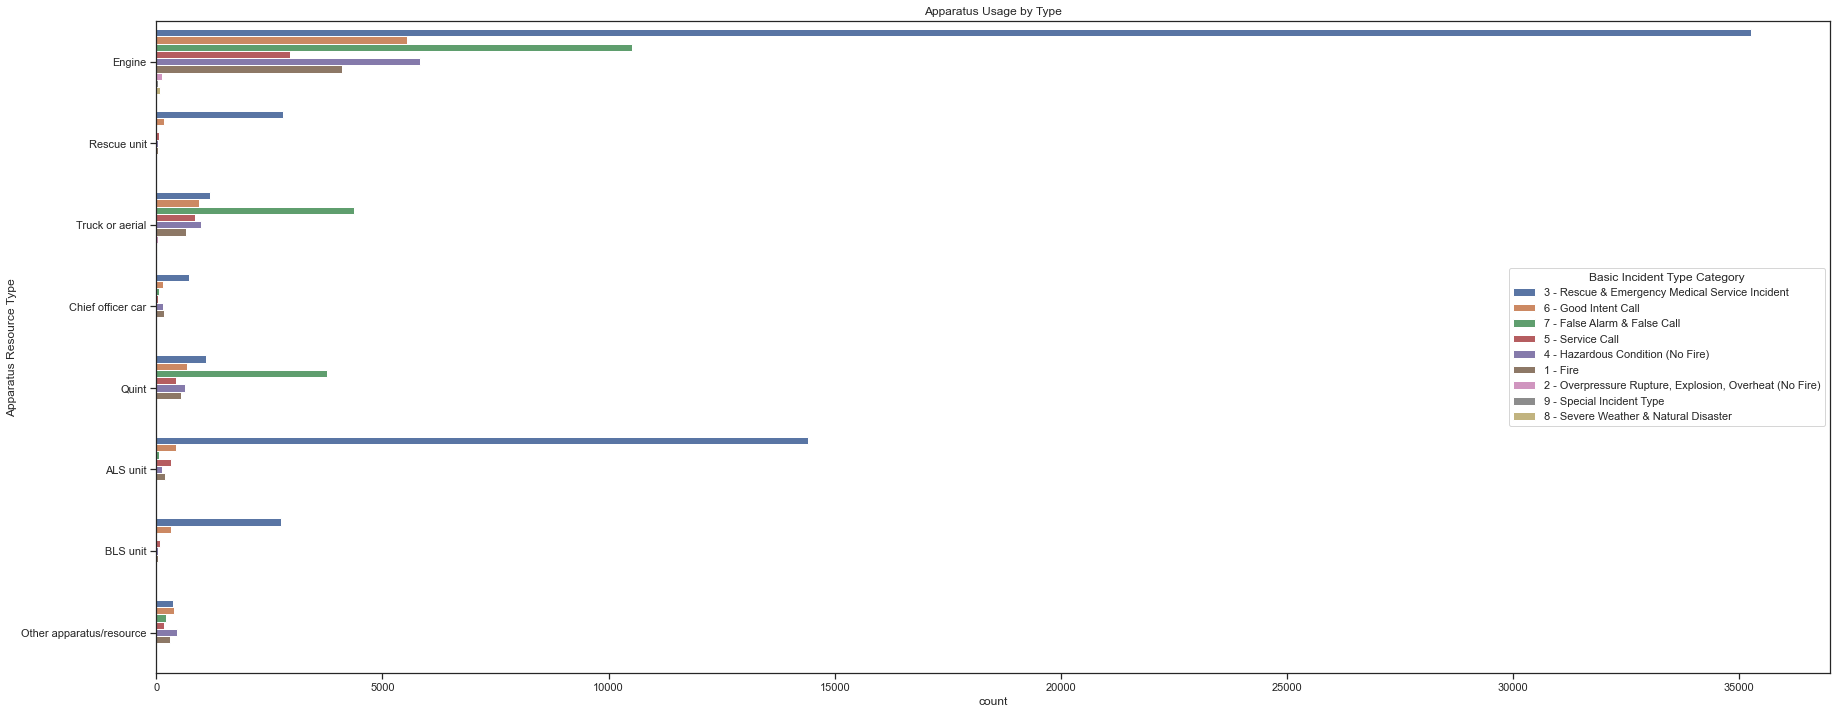

In [55]:
plt.figure(figsize=(30,12))

sns.countplot(data=df_normal_app, y = 'Apparatus Resource Type', hue = 'Basic Incident Type Category').set(title = "Apparatus Usage by Type") #, hue="FireType", 
plt.savefig('Apparatus_by_type2.png')
plt.show

In [56]:
ems_df[['year', 'Apparatus Resource Type']].value_counts(['year', 'Apparatus Resource Type']).sort_index().to_frame()

0
year Apparatus Resource Type             
2017 ALS unit                        1200
     BLS unit                         645
     Chief officer car                229
     Engine                          2771
     Ground fire suppression, other     4
     Medical & rescue unit, other     105
     Other apparatus/resource          35
     Quint                             48
     Rescue unit                      767
     Support apparatus, other          20
     Truck or aerial                  111
2018 ALS unit                        1317
     BLS unit                         571
     Brush truck                      536
     Chief officer car                243
     Engine                          2056
     Medical & rescue unit, other      91
     Other apparatus/resource          53
     Quint                             49
     Rescue unit                      751
     Support apparatus, other           3
     Truck or aerial                  126
2019 ALS unit                        1907
     BLS unit                         708
     Chief officer car                239
     Engine                          2846
     Ground fire suppression, other     2
     Medical & rescue unit, other      38
     Other apparatus/resource          80
     Quint                            165
     Rescue unit                      402
     Truck or aerial                   46
2020 ALS unit                        1945
     BLS unit                         557
     Chief officer car                  6
     Engine                          2613
     Medical & rescue unit, other       5
     Other apparatus/resource         111
     Quint                             44
     Rescue unit                      207
     Truck or aerial                   89
2021 ALS unit                        1083
     BLS unit                         231
     Chief officer car                 10
     Engine                          1337
     Other apparatus/resource          64
     Quint                             55
     Rescue unit                       45
     Truck or aerial                   27

In [57]:
ems_df.groupby(['year', 'Apparatus Resource Type']).size().unstack().T

year,2017,2018,2019,2020,2021
Apparatus Resource Type,,,,,
ALS unit,1200.0,1317.0,1907.0,1945.0,1083.0
BLS unit,645.0,571.0,708.0,557.0,231.0
Brush truck,NaN,536.0,NaN,NaN,NaN
Chief officer car,229.0,243.0,239.0,6.0,10.0
Engine,2771.0,2056.0,2846.0,2613.0,1337.0
"Ground fire suppression, other",4.0,NaN,2.0,NaN,NaN
"Medical & rescue unit, other",105.0,91.0,38.0,5.0,NaN
Other apparatus/resource,35.0,53.0,80.0,111.0,64.0
Quint,48.0,49.0,165.0,44.0,55.0


In [58]:
ems_df[['year', 'Neighborhood']].value_counts(['year', 'Neighborhood']).sort_index().to_frame()


0
year Neighborhood                
2017 10th & Page              193
     Albemarle County         146
     Barracks / Rugby         131
     Barracks Road             86
     Belmont                  730
...                           ...
2021 UVA Lambeth               10
     UVA Main Grounds          52
     UVA Old Medical Grounds   19
     Venable                  114
     Woolen Mills              70

[147 rows x 1 columns]

In [59]:
ems_df.groupby(['year', 'Neighborhood', 'Basic Incident Type Code And Description']).size().unstack().T

year                                                      2017  \
Neighborhood                                       10th & Page   
Basic Incident Type Code And Description                         
300 - Rescue, EMS incident, other                          5.0   
311 - Medical assist, assist EMS crew                     27.0   
320 - Emergency medical service, other                     3.0   
321 - EMS call, excluding vehicle accident with...       119.0   
322 - Motor vehicle accident with injuries                 9.0   
323 - Motor vehicle/pedestrian accident (MV Ped)           3.0   
324 - Motor vehicle accident with no injuries.            25.0   
331 - Lock-in (if lock out , use 511 )                     NaN   
341 - Search for person on land                            NaN   
350 - Extrication, rescue, other                           NaN   
351 - Extrication of victim(s) from building/st...         NaN   
352 - Extrication of victim(s) from vehicle                NaN   
353 - Removal of victim(s) from stalled elevator           2.0   
354 - Trench/below-grade rescue                            NaN   
356 - High-angle rescue                                    NaN   
357 - Extrication of victim(s) from machinery              NaN   
363 - Swift water rescue                                   NaN   
370 - Electrical rescue, other                             NaN   
372 - Trapped by power lines                               NaN   
381 - Rescue or EMS standby                                NaN   

year                                                                 \
Neighborhood                                       Albemarle County   
Basic Incident Type Code And Description                              
300 - Rescue, EMS incident, other                               3.0   
311 - Medical assist, assist EMS crew                           5.0   
320 - Emergency medical service, other                          3.0   
321 - EMS call, excluding vehicle accident with...             40.0   
322 - Motor vehicle accident with injuries                     49.0   
323 - Motor vehicle/pedestrian accident (MV Ped)                4.0   
324 - Motor vehicle accident with no injuries.                 33.0   
331 - Lock-in (if lock out , use 511 )                          NaN   
341 - Search for person on land                                 NaN   
350 - Extrication, rescue, other                                NaN   
351 - Extrication of victim(s) from building/st...              NaN   
352 - Extrication of victim(s) from vehicle                     6.0   
353 - Removal of victim(s) from stalled elevator                NaN   
354 - Trench/below-grade rescue                                 NaN   
356 - High-angle rescue                                         NaN   
357 - Extrication of victim(s) from machinery                   NaN   
363 - Swift water rescue                                        NaN   
370 - Electrical rescue, other                                  NaN   
372 - Trapped by power lines                                    NaN   
381 - Rescue or EMS standby                                     3.0   

year                                                                 \
Neighborhood                                       Barracks / Rugby   
Basic Incident Type Code And Description                              
300 - Rescue, EMS incident, other                               3.0   
311 - Medical assist, assist EMS crew                           7.0   
320 - Emergency medical service, other                          3.0   
321 - EMS call, excluding vehicle accident with...             95.0   
322 - Motor vehicle accident with injuries                     10.0   
323 - Motor vehicle/pedestrian accident (MV Ped)                3.0   
324 - Motor vehicle accident with no injuries.                 10.0   
331 - Lock-in (if lock out , use 511 )                          NaN   
341 - Search for person on land                                 Na

In [60]:
ems_df.groupby(['year', 'Neighborhood', 'Basic Incident Type Code And Description']).size().unstack()

Basic Incident Type Code And Description  300 - Rescue, EMS incident, other  \
year Neighborhood                                                             
2017 10th & Page                                                        5.0   
     Albemarle County                                                   3.0   
     Barracks / Rugby                                                   3.0   
     Barracks Road                                                      4.0   
     Belmont                                                           16.0   
...                                                                     ...   
2021 UVA Lambeth                                                        NaN   
     UVA Main Grounds                                                   2.0   
     UVA Old Medical Grounds                                            NaN   
     Venable                                                            NaN   
     Woolen Mills                                                       NaN   

Basic Incident Type Code And Description  311 - Medical assist, assist EMS crew  \
year Neighborhood                                                                 
2017 10th & Page                                                           27.0   
     Albemarle County                                                       5.0   
     Barracks / Rugby                                                       7.0   
     Barracks Road                                                          6.0   
     Belmont                                                               87.0   
...                                                                         ...   
2021 UVA Lambeth                                                            NaN   
     UVA Main Grounds                                                       2.0   
     UVA Old Medical Grounds                                                NaN   
     Venable                                                               11.0   
     Woolen Mills                                                           3.0   

Basic Incident Type Code And Description  320 - Emergency medical service, other  \
year Neighborhood                                                                  
2017 10th & Page                                                             3.0   
     Albemarle County                                                        3.0   
     Barracks / Rugby                                                        3.0   
     Barracks Road                                                           NaN   
     Belmont                                                                 7.0   
...                                                                          ...   
2021 UVA Lambeth                                                             NaN   
     UVA Main Grounds                                                        NaN   
     UVA Old Medical Grounds                                                 NaN   
     Venable                                                                 2.0   
     Woolen Mills                                                            NaN   

Basic Incident Type Code And Description  321 - EMS call, excluding vehicle accident with injury  \
year Neighborhood                                                                                  
2017 10th & Page                                                                      119.0        
     Albemarle County                                                                  40.0        
     Barracks / Rugby                                                                  95.0        
     Barracks Road                                                                     62.0        
     Belmont                                                                          580.0        
...                                                                                     ...        

In [61]:
ems_df.groupby(['Neighborhood', 'Basic Incident Type Code And Description']).size().unstack().sort

AttributeError: 'DataFrame' object has no attribute 'sort'